### 타이타닉호 생존율 분석하기

1. 데이터 수집

In [1]:
import seaborn as sns
import pandas as pd

In [2]:
titanic = sns.load_dataset("titanic")

#titanic_2 = pd.read_csv('titanic.csv')
titanic.to_csv('C:/DataMining/titanicData/titanic.csv', index = False)

2. 데이터 준비

In [3]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
#결측값을 중앙값으로
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

#출항항구 코드, null은 카운트 X
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [5]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

#deck 번호
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [6]:
titanic['deck'] = titanic['deck'].fillna('C')
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

3. 데이터 탐색

In [7]:
titanic.info() #타이타닉 데이터 기본 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
titanic.survived.value_counts() #survived 속성값의 빈도 확인

survived
0    549
1    342
Name: count, dtype: int64

###### 차트를 그려 데이터 시각화 

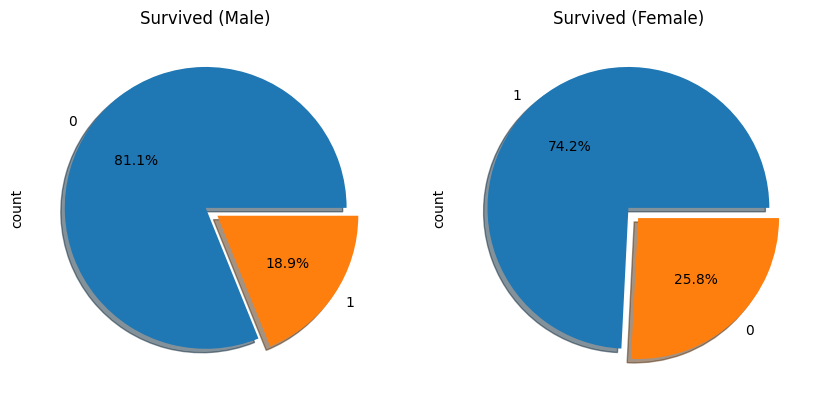

In [9]:
#남자 승객과 여자 승객의 생존율을 pie 차트로 그리기

import matplotlib.pyplot as plt

f,ax = plt.subplots(1, 2, figsize = (10, 5)) #한 줄에 두개의 차트를 그리도록 크기 설정

#남자 승객의 생존율
titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)

#여자 승객의 생존율
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)

#차트 제목 설정
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

##### 등급별 생존자 수 차트로 나타내기

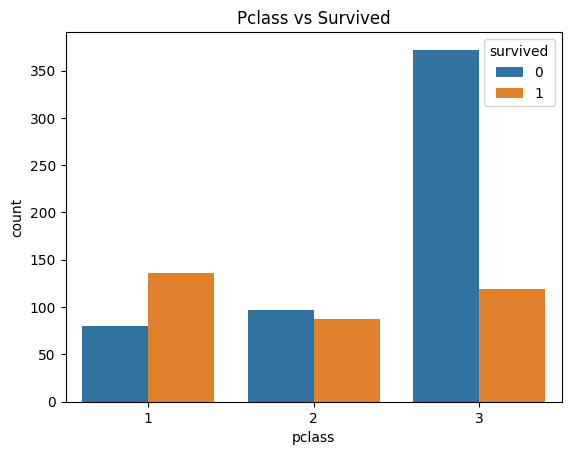

In [10]:
#x - x축 데이터 선택, Hue - 추가적인 범수형 변수
sns.countplot(x='pclass', hue = 'survived', data = titanic)

plt.title('Pclass vs Survived')

plt.show()

생존자(1)는 1등급일수록 가장 많았으며 사망자(0)는 3등급에서 월등히 많은 것을 확인할 수 있음

4. 데이터 모델링

##### 상관 분석을 위한 상관 계수 구하고 저장

In [11]:
# 문자열이 아닌 열만을 선택하여 상관 계수를 계산
numerical_cols = titanic.select_dtypes(include=['float64', 'int64']).columns

#피어슨 상관 계수를 적용하여 상관계수를 구함
titanic_corr = titanic[numerical_cols].corr(method='pearson')
titanic_corr

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [12]:
titanic_corr.to_csv('C:/DataMining/titanicData/titanic_corr.csv',index = False)

피어슨 상관 계수 = 공분산 / (표준편차 * 표준편차)

##### 특정 변수 사이의 상관 계수 구하기

In [13]:
titanic['survived'].corr(titanic['adult_male']) #survived와 adult_male 변수 사이의 상관 계수를 구함

-0.5570800422053259

In [14]:
titanic['survived'].corr(titanic['fare']) #survived와 fare 변수 사이의 상관 계수를 구함

0.2573065223849622

5. 결과 시각화

##### 산점도로 상관 분석 시각화하기

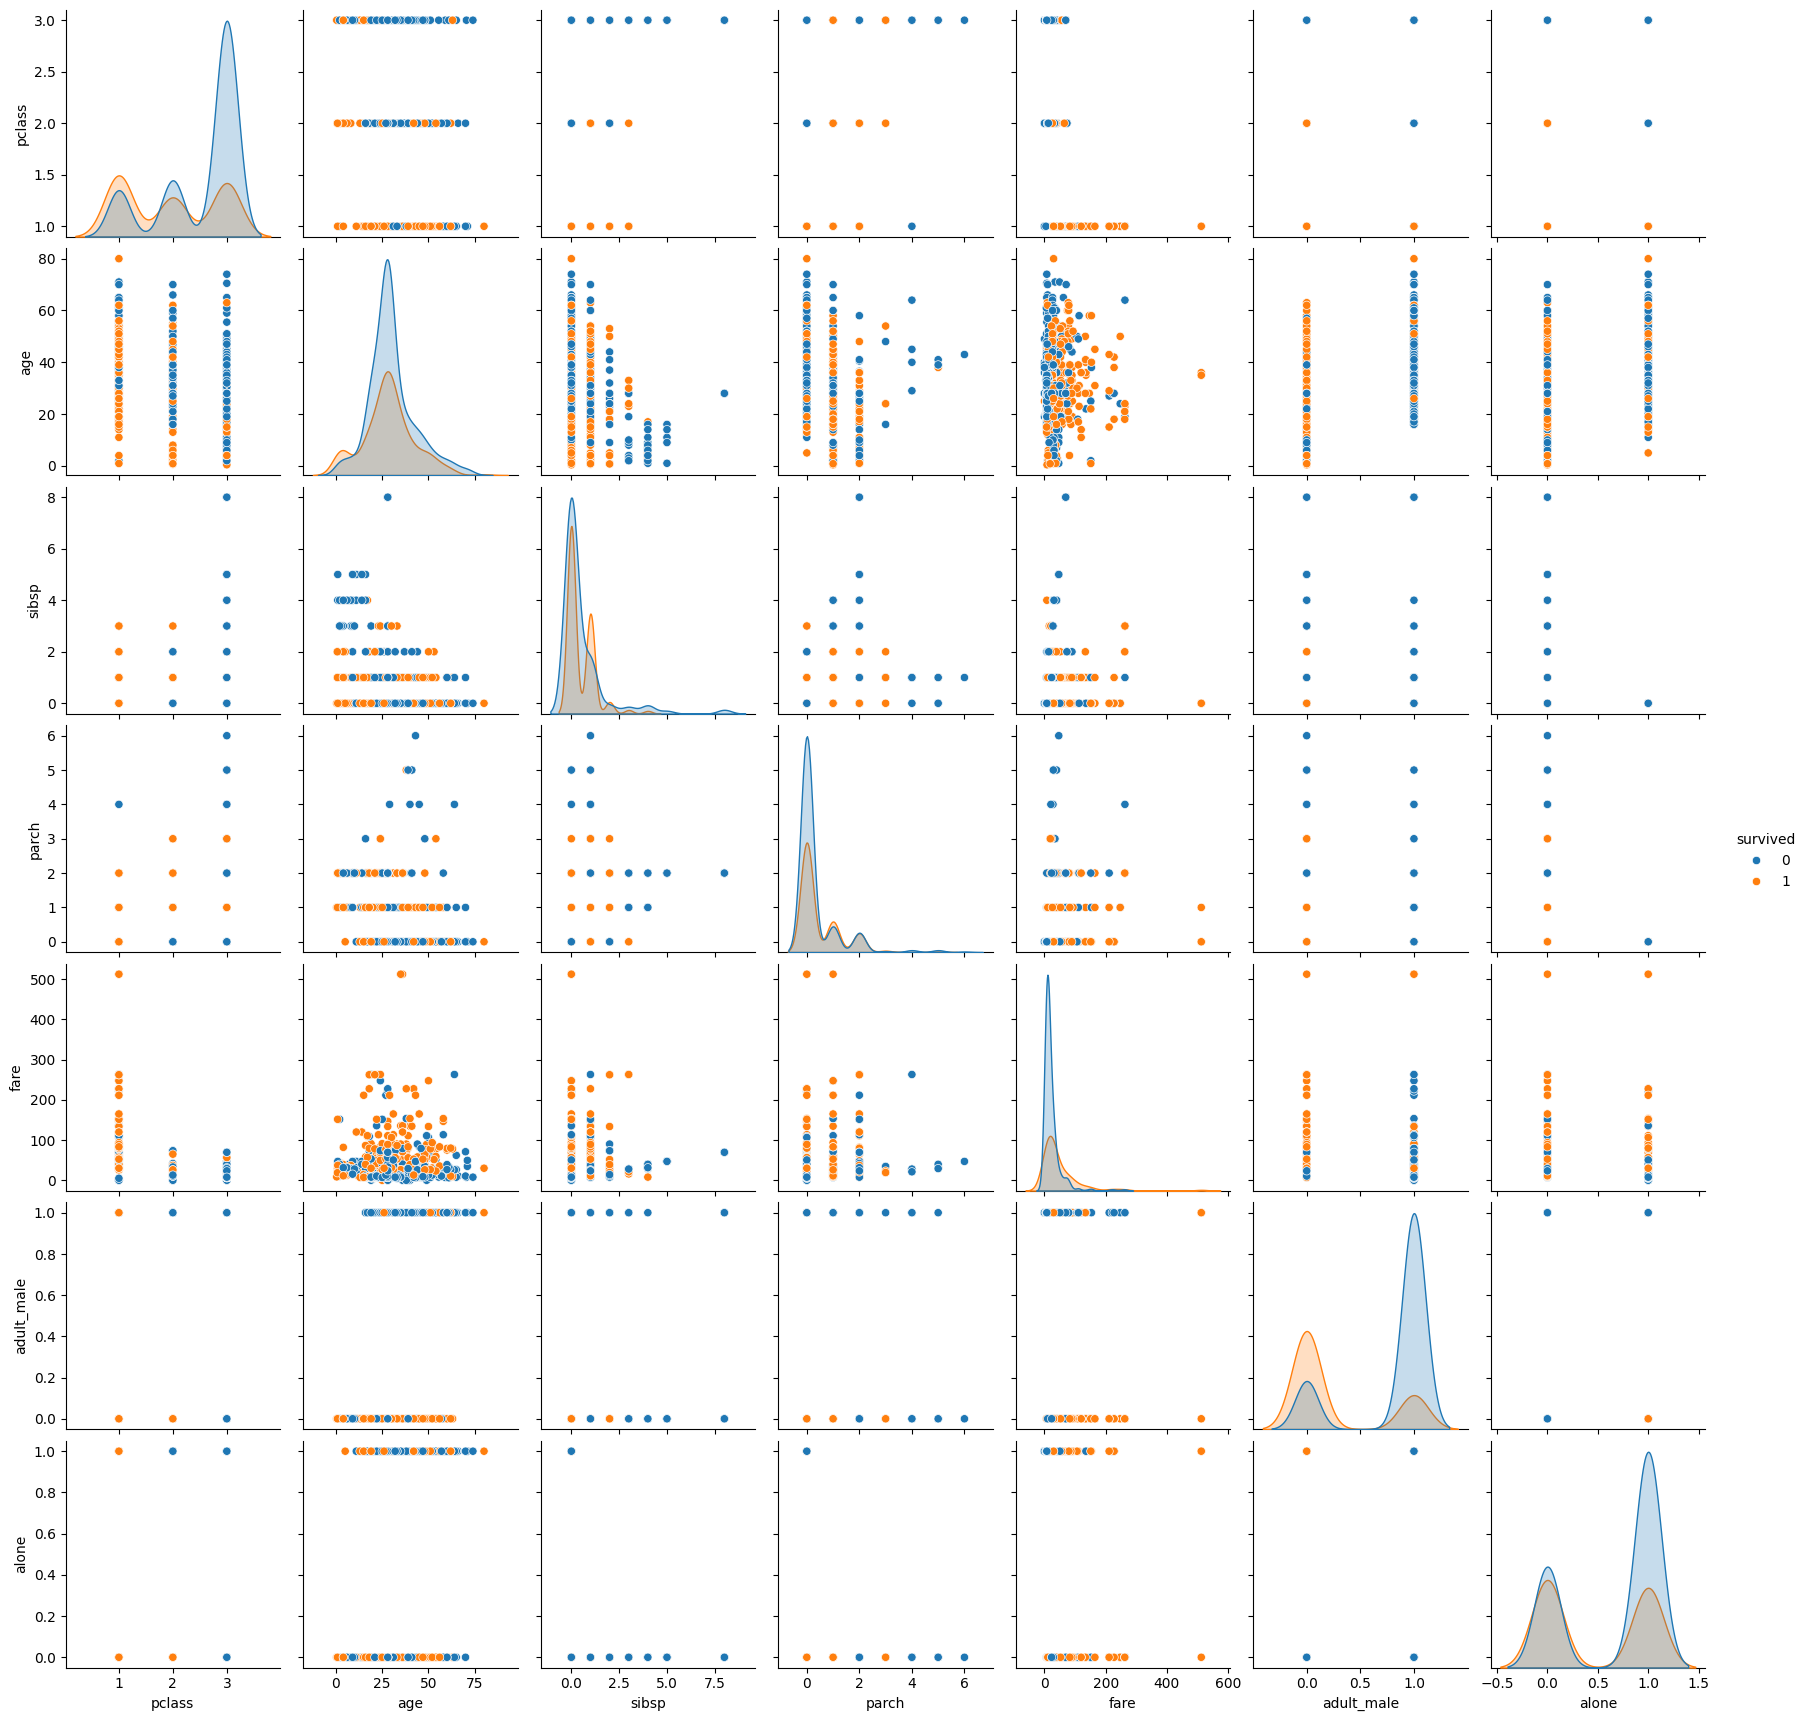

In [15]:
#변수 간의 상관 분석 시각화를 위해 pairplot() 그리기
sns.pairplot(titanic, hue = 'survived') #pairplot() 함수를 사용하여 타이타닉 데이터의 차트를 그림, hue는 종속 변수를 지정

plt.show()

##### 두 변수의 상관관계 시각화하기

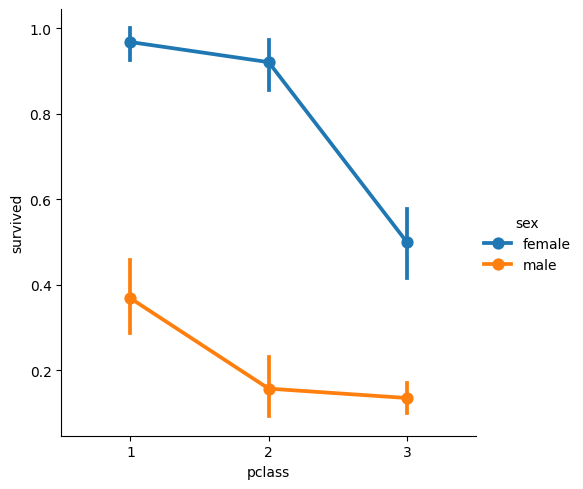

In [16]:
#생존자의 객실 등급과 성별 관계를 catplot()로 그리기

#x, y인자에 컬럼명, hue에 종속변수명, data인자에 데이터프레임 구조를 갖는 데이터
#catplot() 함수를 사용하여 pclass와 survived 변수의 관계를 차트로 그림
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')

plt.show()

##### 변수 사이의 상관 계수를 히트맵으로 시각화하기

In [17]:
#10살 단위로 등급을 나누어 0~7의 값으로 바꿈
def category_age(x):
    if x < 10: return 0
    elif x < 20: return 1
    elif x < 30: return 2
    elif x < 40: return 3
    elif x < 50: return 4
    elif x < 60: return 5
    elif x < 70: return 6
    else: return 7

In [18]:
#컬럼에 함수적용 - 데이터프레임[컬럼].apply(함수명)
#category_age 함수를 적용하여 새로운 age2 열을 만들어 추가
titanic['age2'] = titanic['age'].apply(category_age)

In [19]:
#컬럼에 딕셔너리 세트 변환 적용 - map(딕셔너리) 형태 사용
#male/female에서 1/0으로 치환
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [20]:
#sibsp : 함께 탑승한 형제 또는 배우자 수, parch : 함께 탑승한 부모 또는 자녀 수
#가족의 수를 구하여 family 열 추가
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1
titanic.to_csv('C:/DataMining/titanicData/titanic3.csv',index =False)

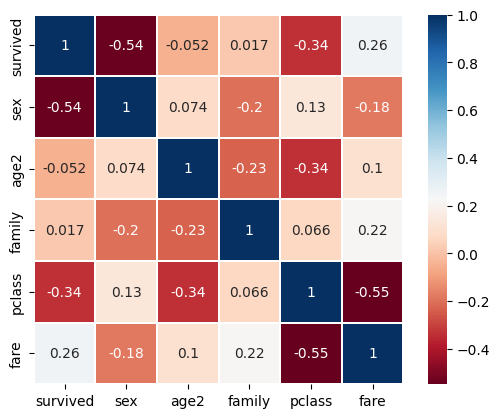

In [21]:
#히트맵에 사용할 데이터 추출
heatmap_data = titanic[['survived','sex','age2','family','pclass','fare']]

#히트맵에 사용할 색상맵 지정
colormap = plt.cm.RdBu

#default값은 pearson 상관계수
#corr() 함수로 구한 상관 계수로 히트맵을 생성
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax= 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True, annot_kws = {"size": 10})

plt.show()


표에서 y축의 survived를 보면 다음과 같은 정보를 알 수 있다.

1. 남자일 수록 생존율이 낮다.
2. 나이가 많을 수록 생존율이 낮다.
3. 가족 수가 많을 수록 생존율이 높다.
4. 숫자가 많은 등급(1<2<3)일수록 생존율이 낮다.
5. 요금이 높을수록 생존율이 높다.